> Никита Царьков, 307 группа



In [0]:
import numpy as np
import scipy as sp

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
sns.set()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Решение задачи Коши для системы диференциальных уравнений

> Методичка [тык](https://cdn.discordapp.com/attachments/696096175086108816/702987831345414254/task8_2016.pdf)

Cистема выглядит так:
$$y_1'(x) = 2x(y_2(x))^{\frac{1}{B}}y_4(x)$$

$$y_2'(x) = 2Bx\; exp\left ( \frac{B}{C}(y_3(x)-A) \right ) y_4(x)$$

$$y_3'(x)=2Cx\, y_4(x)$$

$$y_4'(x) = -2x\, ln\, y_1(x)$$

Начальное условие:
$$y_1(0)=y_2(0)=y_4(0)=1,\;  y_3(0)=A$$
на отрезке
$$x=[0,5]$$

Точное решение задачи имеет вид:
$$y_1(x)=e^{sin\,x^2}$$

$$y_2(x)=e^{B\,sin\,x^2}$$

$$y_3(x)=C\,sin\,x^2+A$$

$$y_4(x)=cos\,x^2$$


## Функции и ответы

In [0]:
def inv_pow(a, B):  # избавляемся от nan связанных с комплексными
    if B % 2 == 0:
        return np.power(a, 1 / B)
    else:
        return np.sign(a) * np.power(np.abs(a), 1 / B)

In [0]:
def f(x, y):
    return np.array([2 * x * inv_pow(y[1], B) * y[3],
                     2 * B * x * np.exp(B / C * (y[2] - A)) * y[3],
                     2 * C * x * y[3],
                     -2 * x * np.log(y[0])
                     ])

In [0]:
def f(x, y):
    return np.array([2 * x * y[1]**(1/B) * y[3],
                     2 * B * x * np.exp(B / C * (y[2] - A)) * y[3],
                     2 * C * x * y[3],
                     -2 * x * np.log(y[0])
                     ])

In [0]:
def exact_ans(x):
    return np.array([np.exp(np.sin(x**2)),
                     np.exp(B * np.sin(x**2)),
                     C * np.sin(x**2) + A,
                     np.cos(x**2)])

## Варианты

In [0]:
variants = {1: [0.05, 3, 3, -3, 26],
            2: [0.10, -3, 2, 1, 27],
            3: [0.15, -2, -2, 2, 28],
            4: [0.20, 2, -1, -1, 29],
            5: [0.25, 1, 1.5, -2, 30],
            6: [0.30, -1, -3, 3, 31],
            7: [0.35, 3, -3, 3, 26],
            8: [0.40,-3, 2.5, 1, 27],
            9: [0.45, -2, 2, -2, 28],
            10: [0.55, 2, -1, 2, 29],
            11: [0.60, 1, 3, 3, 30],
            12: [0.65, -1, -2, -1, 31],
            13: [0.70, 3, 1.5, -1, 26],
            14: [0.75, -3, -2, -2, 27],
            15: [0.80, -2, 3, -1, 28],
            16: [0.85, 2, -2, 3, 29],
            17: [0.90, 1, -3, 2, 30],
            18: [0.95, -1, -1, -3, 31],
            19: [np.sqrt(5)/2 - 1/2, 3, -1, -2, 28],
            20: [3/2 - np.sqrt(5)/2, -3, 2.5, 2, 30]}

In [0]:
variant_num = 10
c2, A, B, C, opponent_num = variants[variant_num]
c2, A, B, C, opponent_num

(0.55, 2, -1, 2, 29)

In [0]:
params = {'x0': 0,
          'y0': np.array([1, 1, A, 1]),
          'x_end': 5,
          'n': 200}

## Решатель задачи

In [0]:
def solve(method_num, h, f, x0, y0, x_end, n):
    '''
    Суперуникальный метод, в который я накидал абсолютно все что мог

    Параметры
    ---------
    method_num: выбор метода для решения задачи (номер формулы)
    f: функция в ОДУ
    x0: аргумент для начального условия ОДУ
    x_end: правый край отрезка, где определено решение
    y0: значение начального условия y(x0) = y0
    n: количество шагов

    Возвращает
    ----------
    Множество точек, определяющих решение y(x)
    Либо что-нибудь еще
    '''
    
    if method_num > 31 or method_num < 25:
        raise AttributeError('Неправильный номер формулы, надо от 25 до 31')

    if h == -1:
        h = (x_end - x0) / n
    else:
        n = (x_end - x0) / h
        n = int(n)

    x_arr, y_arr = [x0], [y0]

    for i in range(n):
        x_new = x_arr[i] + h
        x_arr.append(x_new)

        y_new = opponent_step[method_num](f, x_arr[i], y_arr[i], h)
        y_arr.append(y_new)

    return np.array(x_arr), np.array(y_arr)


### 2-этапный явный метод Рунге-Кутты

In [0]:
def RK_two_stage_step(f, x0, y0, h):
    '''
    Шаг для двухэтапного явного метода Рунге-Кутты для задачи Коши

    Параметры
    ---------
    f: функция в ОДУ
    x0: аргумент для начального условия ОДУ
    y0: значение начального условия y(x0) = y0
    h: длина шага
    
    Возвращает
    ----------
    Значение y(x) в следующей точке
    '''
    a21 = c2
    b2 = 1 / (2 * c2)
    b1 = 1 - b2

    k1 = f(x0, y0)
    k2 = f(x0 + c2 * h, y0 + h * a21 * k1)

    return y0 + h * (b1 * k1 + b2 * k2)

### Явный метод средней точки (первый метод Рунге-Кутты)

In [0]:
def average_point_step(f, x0, y0, h):
    '''
    Формула (26) при c_2 = 1/2
    Шаг явного метода средней точки.
    Усовершенствование метода Эйлера - первый метод Рунге-Кутты:

    Параметры
    ---------
    f: функция в ОДУ
    x0: аргумент для начального условия ОДУ
    y0: значение начального условия y(x0) = y0
    h: длина шага
    
    Возвращает
    ----------
    Значение y(x) в следующей точке
    '''
    return y0 + h * f(x0 + h/2, y0 + h/2 * f(x0, y0))

### Метод Хойна (метод трапеций)

In [0]:
def trapezes_step(f, x0, y0, h):
    '''
    Формула (27) при c_2 = 1
    Шаг для метода Хойна
    Явный метод трапеций или усовершенствованный метод Эйлера

    Параметры
    ---------
    f: функция в ОДУ
    x0: аргумент для начального условия ОДУ
    y0: значение начального условия y(x0) = y0
    h: длина шага
    
    Возвращает
    ----------
    Значение y(x) в следующей точке
    '''
    return y0 + h/2 * (f(x0, y0) + f(x0 + h, y0 + h * f(x0, y0)))

### Первый метод Рунге-Кутты 3-го порядка

In [0]:
def first_RK_three_step(f, x0, y0, h):
    '''
    Формула (28)
    Шаг для первого метода Рунге-Кутты 3-го порядка

    Параметры
    ---------
    f: функция в ОДУ
    x0: аргумент для начального условия ОДУ
    y0: значение начального условия y(x0) = y0
    h: длина шага
    
    Возвращает
    ----------
    Значение y(x) в следующей точке
    '''
    k1 = f(x0, y0)
    k2 = f(x0 + 1/3 * h, y0 + 1/3 * h * k1)
        
    k3 = f(x0 + 2/3 * h, y0 + 2/3 * h * k2)

    return y0 + h * (1/4 * k1 + 3/4 * k3)

### Второй метод Рунге-Кутты 3-го порядка

In [0]:
def second_RK_three_step(f, x0, y0, h):
    '''
    Формула (29)
    Шаг для второго метода Рунге-Кутты 3-го порядка
    Обобщение квадратурной формулы Симпсона на случай ДУ

    Параметры
    ---------
    f: функция в ОДУ
    x0: аргумент для начального условия ОДУ
    y0: значение начального условия y(x0) = y0
    h: длина шага
    
    Возвращает
    ----------
    Значение y(x) в следующей точке
    '''
    k1 = f(x0, y0)
    k2 = f(x0 + 1/2 * h, y0 + 1/2 * h * k1)
        
    k3 = f(x0 + h, y0 - h * k1 + 2 * h * k2)

    return y0 + h * (1/6 * k1 + 4/6 * k2 + 1/6 * k3)

### Первый метод Рунге-Кутты 4-го порядка

In [0]:
def first_RK_four_step(f, x0, y0, h):
    '''
    Формула (30)
    Шаг для первого метода Рунге-Кутты 4-го порядка
    (классика)

    Параметры
    ---------
    f: функция в ОДУ
    x0: аргумент для начального условия ОДУ
    y0: значение начального условия y(x0) = y0
    h: длина шага
    
    Возвращает
    ----------
    Значение y(x) в следующей точке
    '''
    k1 = f(x0, y0)
    k2 = f(x0 + 1/2 * h, y0 + 1/2 * h * k1)
        
    k3 = f(x0 + 1/2 * h, y0 + 1/2 * h * k2)
        
    k4 = f(x0 + h, y0 + h * k3)

    return y0 + h * (1/6 * k1 + 1/3 * k2 + 1/3 * k3 + 1/6 * k4)

### Второй метод Рунге-Кутты 4-го порядка

In [0]:
def second_RK_four_step(f, x0, y0, h):
    '''
    Формула (31)
    Шаг для второго метод Рунге-Кутты 4-го порядка
    Обобщение квадратурной формулы 3/8

    Параметры
    ---------
    f: функция в ОДУ
    x0: аргумент для начального условия ОДУ
    y0: значение начального условия y(x0) = y0
    h: длина шага
    
    Возвращает
    ----------
    Значение y(x) в следующей точке
    '''
    k1 = f(x0, y0)
    k2 = f(x0 + 1/3 * h, y0 + 1/3 * h * k1)
        
    k3 = f(x0 + 2/3 * h, y0 - 1/3 * h * k1 + h * k2)
        
    k4 = f(x0 + h, y0 + h * k1 - h * k2 + h * k3)

    return y0 + h * (1/8 * k1 + 3/8 * k2 + 3/8 * k3 + 1/8 * k4)

## Задание 1

In [0]:
opponent_step = {25: RK_two_stage_step,
                   26: average_point_step,
                   27: trapezes_step,
                   28: first_RK_three_step,
                   29: second_RK_three_step,
                   30: first_RK_four_step,
                   31: second_RK_four_step}

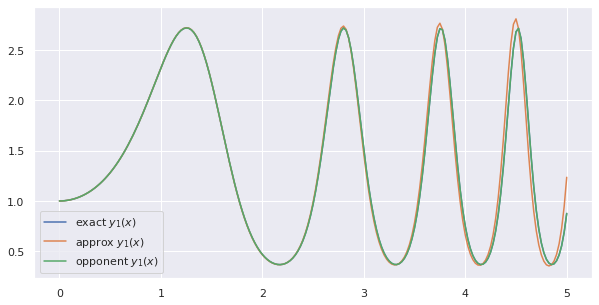

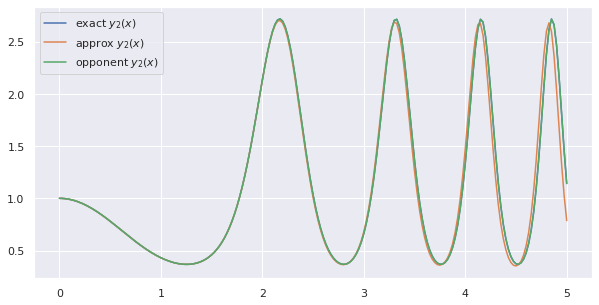

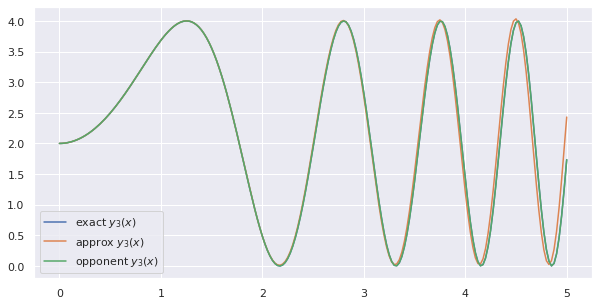

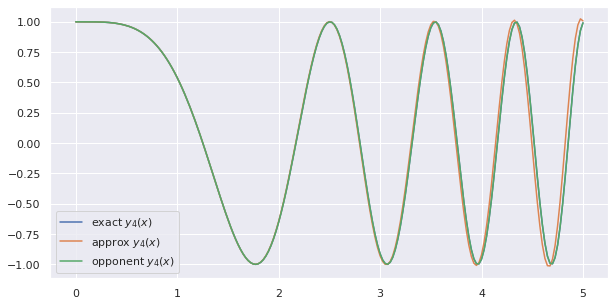

In [0]:
RK_X, RK_Y = solve(25, -1, f, **params)
RK_X, RK_Y

opponent_X, opponent_Y = solve(31, -1, f, **params)
opponent_X, opponent_Y

for i in range(4):
    plt.figure(figsize=(10, 5))
    plt.plot(RK_X, exact_ans(RK_X)[i], label='exact $y_{%s}(x)$' % (i+1))
    plt.plot(RK_X, RK_Y[:,i], label='approx $y_{%s}(x)$' % (i+1))
    plt.plot(opponent_X, opponent_Y[:,i], label='opponent $y_{%s}(x)$' % (i+1))
    plt.legend()
    plt.show()

## Задание 2

In [0]:
def plot_norms(method_num):
    '''
    Cтроит график зависимости нормы точной полной погрешности 
    в конце отрезка от длины шага (1/ 2^k)

    Параметры
    ---------
    method_num: номер для формулы метода
    (26) - Двухэтапный явный метод Рунге-Кутты 
    (27) - (31) - методы-оппоненты
    
    Ничего не возвращает
    --------------------
    Строит графики
    '''
    if method_num > 31 or method_num < 25:
        raise AttributeError('Неправильный номер формулы, надо от 25 до 31')

    kk = np.arange(1, 15)
    norms = []

    for k in kk:
        x0, y0, x_end = params['x0'], params['y0'], params['x_end']

        method_x, method_y = solve(method_num, -1, f, x0, y0, x_end, (x_end - x0)*(2**k))
        err = np.linalg.norm(exact_ans(method_x[-1]) - method_y[-1])
        norms.append(-np.log2(err))
        print(k, -np.log2(err))

    plt.figure(figsize=(10, 5))
    plt.plot(kk, norms)
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


1 nan
2 nan
3 nan
4 nan
5 -0.5239665810088037
6 1.6915413037672415
7 3.7742691191329785
8 5.8138272791138075
9 7.833623884236583
10 9.843587292156263
11 11.848593071104744
12 13.851102987093311
13 15.85235979216021
14 17.852988399611647


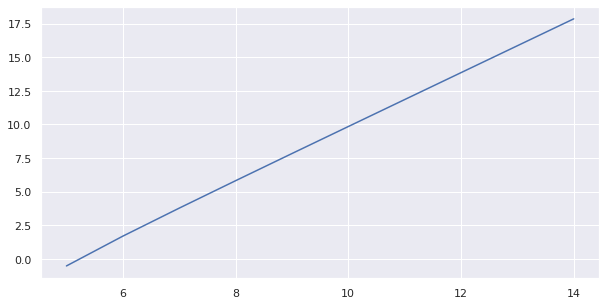

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


1 nan
2 nan
3 0.1904168624048992
4 4.124265177042313
5 8.8245006943598
6 13.577938751476973
7 18.20071099717474
8 22.645757642757747
9 26.926905751134868
10 31.088129996074898
11 35.18873854140715
12 39.19221691909673
13 40.33165529975141
14 41.65446094613312


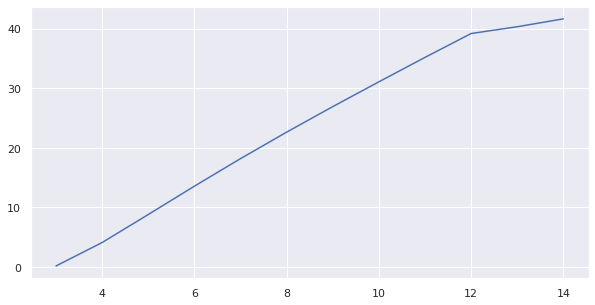

In [0]:
plot_norms(25)
plot_norms(31)

## Задание 3

In [0]:
def get_h_opt(h, tol, y_n, y_2n, p):
    r_n = (y_2n - y_n) / (1 - 2 ** (-p))
    r_2n = (y_2n - y_n) / (2 ** p - 1)

    return h * np.power(tol / np.linalg.norm(r_n), 1 / p)
    # return 0.5 * h * np.power(tol / np.linalg.norm(r_2n), 1 / p)

In [0]:
def solve_h_opt(method_num, p, tol, h, y_n, y_2n, f, x0, y0, x_end, n):

    if method_num > 31 or method_num < 25:
        raise AttributeError('Неправильный номер формулы, надо от 25 до 31')


    h_opt = get_h_opt(h, tol, y_n, y_2n, p)

    n = (x_end - x0) / h_opt
    n = int(n)

    x_arr, y_arr = [x0], [y0]

    for i in range(n):
        x_new = x_arr[i] + h_opt
        x_arr.append(x_new)

        y_new = opponent_step[method_num](f, x_arr[i], y_arr[i], h_opt)
        y_arr.append(y_new)

    return np.array(x_arr), np.array(y_arr), h_opt
    


In [0]:
k = 7
tol = 1e-5
p = 2
h_old = 1 / 2**k

In [0]:
x0, y0 = solve(25, h_old, f, **params)
x1, y1 = solve(25, h_old / 2, f, **params)

In [0]:
x_opt, y_opt, h_opt = solve_h_opt(25, p, tol, h_old, y0[-1], y1[-1], f, **params)

In [0]:
print(f"h_old: {h_old:.10f}")
print(f"h_opt: {h_opt:.10f}")

h_old: 0.0078125000
h_opt: 0.0000909754


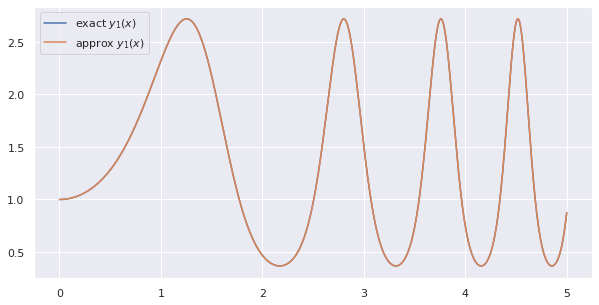

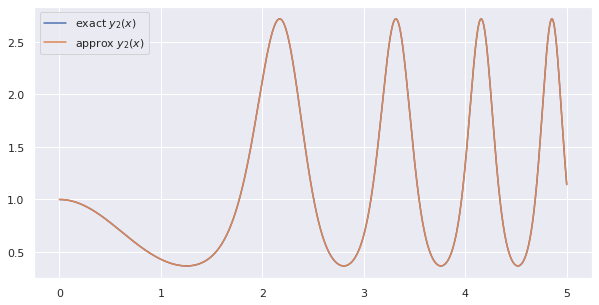

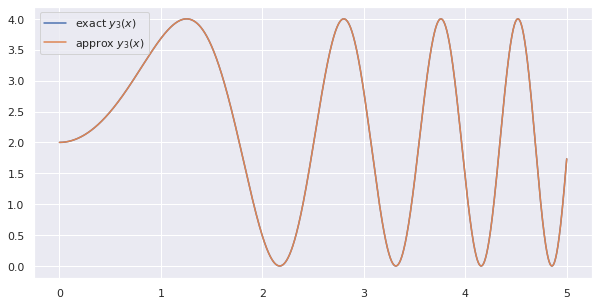

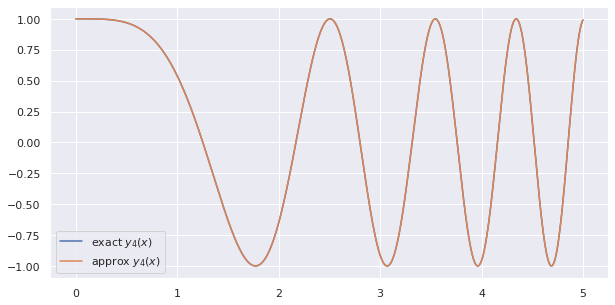

In [0]:
for i in range(4):
    plt.figure(figsize=(10, 5))
    plt.plot(x_opt, exact_ans(x_opt)[i], label='exact $y_{%s}(x)$' % (i+1))
    plt.plot(x_opt, y_opt[:,i], label='approx $y_{%s}(x)$' % (i+1))
    plt.legend()
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


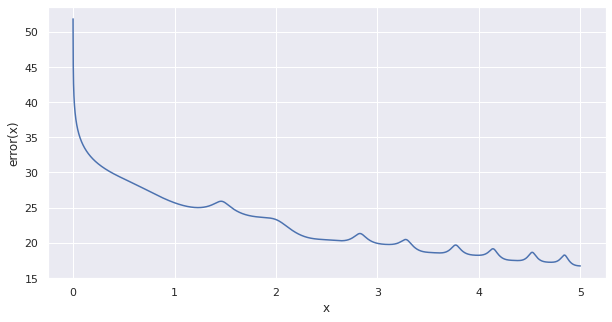

In [0]:
err = exact_ans(x_opt).T - y_opt
err = -np.log2(np.sum(err**2, axis=1)**0.5)

plt.figure(figsize=(10, 5))
plt.plot(x_opt, err)
plt.xlabel('x')
plt.ylabel('error(x)')
plt.show()


## Задание 4

In [0]:
def get_first_step(p, tol, f, x0, y0, x_end):
    delta1 = np.power(1 / max(np.abs(x0), np.abs(x_end)), p + 1) + \
    np.linalg.norm(f(x0, y0)) ** (p + 1)
    
    h1 = np.power(tol / delta1, 1 / (p + 1))
    u1 = trapezes_step(f, x0, y0, h1)

    delta2 = np.power(1 / max(np.abs(x0 + h1), np.abs(x_end)), p + 1) + \
    np.linalg.norm(f(x0 + h1, y0 + u1)) ** (p + 1)

    h2 = np.power(tol / delta2, 1 / (p + 1))

    return min(h1, h2)
   

In [0]:
def solve_optimal(method_num, p, rtol, atol, f, x0, y0, x_end, n):

    if method_num > 31 or method_num < 25:
        raise AttributeError('Неправильный номер формулы, надо от 25 до 31')

    tol = rtol * np.linalg.norm(y0) + atol
    h = get_first_step(p, tol, f, x0, y0, x_end)

    x_arr, y_arr = [x0], [y0]

    y_old = opponent_step[method_num](f, x0, y0, h)
    y_mid = opponent_step[method_num](f, x0, y0, h / 2)
    y_new = opponent_step[method_num](f, x0 + h/2, y_mid, h/2)

    err_old = (y_new - y_old) / (1 - 2 ** (-p))
    err_new = (y_new - y_old) / ((2 ** p) - 1)

    h_cur = h
    h_next = h
    h_max = h_cur

    while x_arr[-1] < x_end:
        if np.linalg.norm(err_old) > tol * 2**p:
            h_cur /= 2

            y_old = y_mid
            y_mid = opponent_step[method_num](f, x_arr[-1], y_arr[-1], h_cur / 2)
            y_new = opponent_step[method_num](f, x_arr[-1] + h_cur / 2, y_mid, h_cur / 2)

            err_old = (y_new - y_old) / (1 - 2 ** (-p))
            err_new = (y_new - y_old) / ((2 ** p) - 1)
            
            continue

        elif tol < np.linalg.norm(err_old) <= tol * 2**p:
            h_next = h_cur / 2

            x_arr.append(x_arr[-1] + h_cur)
            y_arr.append(y_new + err_new)

            h_max = max(h_max, h_cur)

        elif tol * (2 ** (-p - 1)) <= np.linalg.norm(err_old) <= tol:
                h_next = h_cur

                x_arr.append(x_arr[-1] + h_cur)
                y_arr.append(y_old + err_old)

                h_max = max(h_max, h_cur)

        elif np.linalg.norm(err_old) < tol * (2 ** (-p - 1)):
                h_next = min(2 * h_cur, h_max)

                x_arr.append(x_arr[-1] + h_cur)
                y_arr.append(y_old + err_old)

                h_max = max(h_max, h_cur)

        h_cur = h_next

        y_old = opponent_step[method_num](f, x_arr[-1], y_arr[-1], h_cur)
        y_mid = opponent_step[method_num](f, x_arr[-1], y_arr[-1], h_cur / 2)
        y_new = opponent_step[method_num](f, x_arr[-1] + h_cur / 2, y_mid, h_cur / 2)

        err_old = (y_new - y_old) / (1 - 2 ** (-p))
        err_new = (y_new - y_old) / ((2 ** p) - 1)
        tol = rtol * np.linalg.norm(y_arr[-1]) + atol

    return np.array(x_arr), np.array(y_arr)


In [0]:
def plot_norms_optimal(method_num, rtol, atol, p):

    if method_num > 31 or method_num < 25:
        raise AttributeError('Неправильный номер формулы, надо от 25 до 31')

    x_opt, y_opt = solve_optimal(method_num, p, rtol, atol, f, **params)

    for i in range(4):
        plt.figure(figsize=(10, 5))
        plt.plot(x_opt, exact_ans(x_opt)[i], label='exact $y_{%s}(x)$' % (i+1))
        plt.plot(x_opt, y_opt[:,i], label='approx $y_{%s}(x)$' % (i+1))
        plt.legend()
        plt.show()


    err = exact_ans(x_opt).T - y_opt
    err = -np.log2(np.sum(err**2, axis=1)**0.5)

    plt.figure(figsize=(10, 5))
    plt.plot(x_opt, err)
    plt.xlabel('x')
    plt.ylabel('error(x)')
    plt.show()


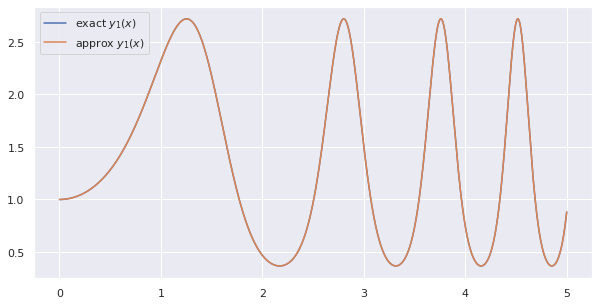

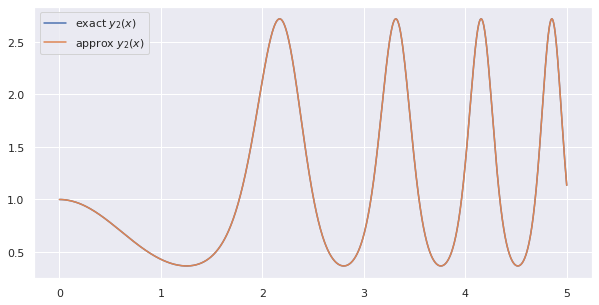

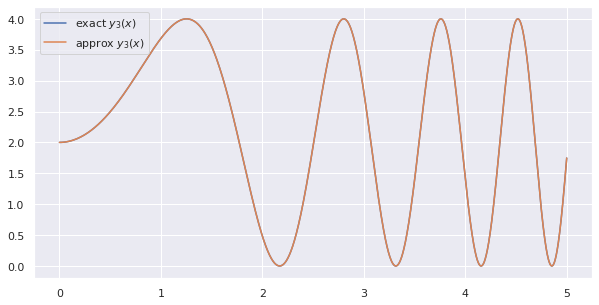

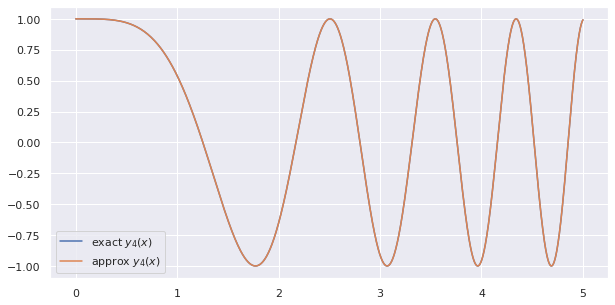

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log2


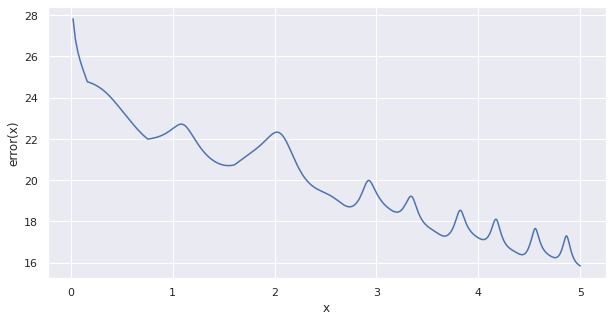

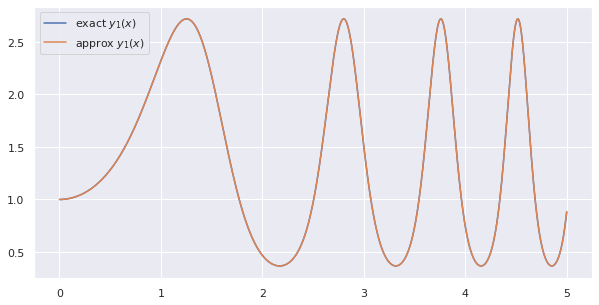

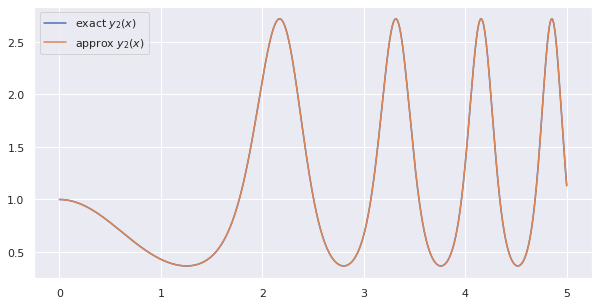

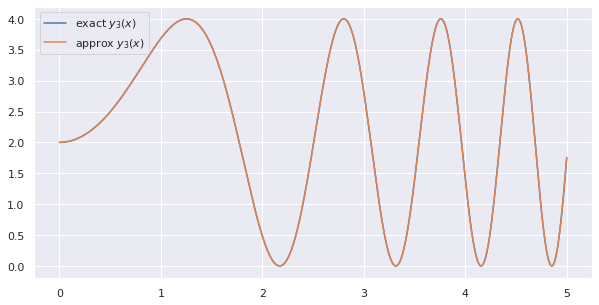

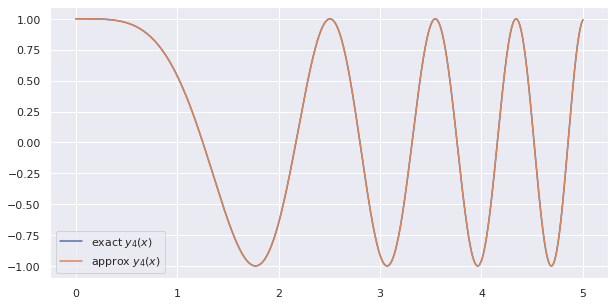

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log2


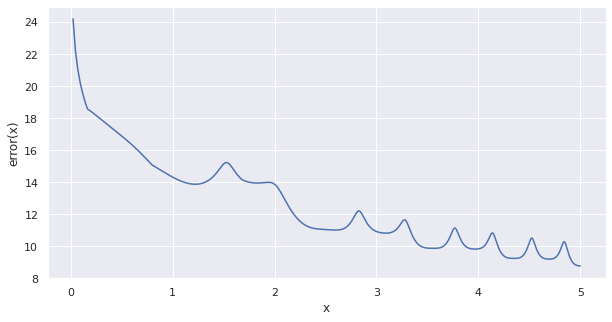

In [0]:
plot_norms_optimal(25, 1e-6, 1e-12, 2)
plot_norms_optimal(26, 1e-6, 1e-12, 4)